In [12]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

bike_data=pd.read_csv('bike_types_and_names.csv')
# Parameters for dataset creation
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = (end_date - start_date).days
bikes = bike_data.to_dict('records')

# Special events for sales spikes
christmas = [datetime(year, 12, 25) for year in range(2021, 2024)]
black_friday = [datetime(year, 11, 26) for year in range(2021, 2024)]
tour_de_france = [datetime(year, 7, 1) for year in range(2021, 2024)]
summer_season = [(datetime(year, 6, 1), datetime(year, 8, 31)) for year in range(2021, 2024)]

# Function to generate random sales with seasonal spikes
def generate_sales_data(n=1000):
    sales_data = []
    for _ in range(n):
        bike = random.choice(bikes)
        random_days = random.randint(0, date_range)
        date_ordered = start_date + timedelta(days=random_days)
        
        # Base sales quantity
        base_quantity = np.random.poisson(3)
        
        # Adjust sales quantity for special events
        if any(abs((date_ordered - event).days) <= 7 for event in christmas):
            quantity = base_quantity + np.random.randint(5, 15)  # Christmas spike
        elif any(abs((date_ordered - event).days) <= 7 for event in black_friday):
            quantity = base_quantity + np.random.randint(10, 20)  # Black Friday spike
        elif any(start <= date_ordered <= end for start, end in summer_season):
            quantity = base_quantity + np.random.randint(2, 8)    # Summer season boost
        elif any(abs((date_ordered - event).days) <= 30 for event in tour_de_france):
            if bike['bike_type'] == 'Road Bike':
                quantity = base_quantity + np.random.randint(10, 25)  # Tour de France spike for road bikes
            else:
                quantity = base_quantity + np.random.randint(0, 5)
        else:
            quantity = base_quantity

        sales_data.append({
            'bike_name': bike['bike_name'],
            'bike_type': bike['bike_type'],
            'date_ordered': date_ordered.strftime('%Y-%m-%d'),
            'quantity': max(1, quantity)  # Ensure at least 1 sale
        })
    
    return pd.DataFrame(sales_data)

# Generate the sales dataset
sales_dataset = generate_sales_data(5000)  # Generate 5000 sales records
sales_dataset.head(100)


,bike_name,bike_type,date_ordered,quantity
0,TrailBlazer XT,Mountain Bike,2023-11-02,1
1,Mountain Climber XT,Mountain Bike,2021-06-01,7
2,TrailBlazer XT,Mountain Bike,2023-04-04,1
3,Mountain Climber XT,Mountain Bike,2023-12-26,11
4,AirMaster 300,BMX,2023-10-30,3
...,...,...,...,...
95,Mountain Climber XT,Mountain Bike,2022-12-24,15
96,Mountain Climber XT,Mountain Bike,2023-11-01,2
97,UrbanCommuter 500,Hybrid Bike,2021-08-15,5
98,Mountain Climber XT,Mountain Bike,2022-11-11,3


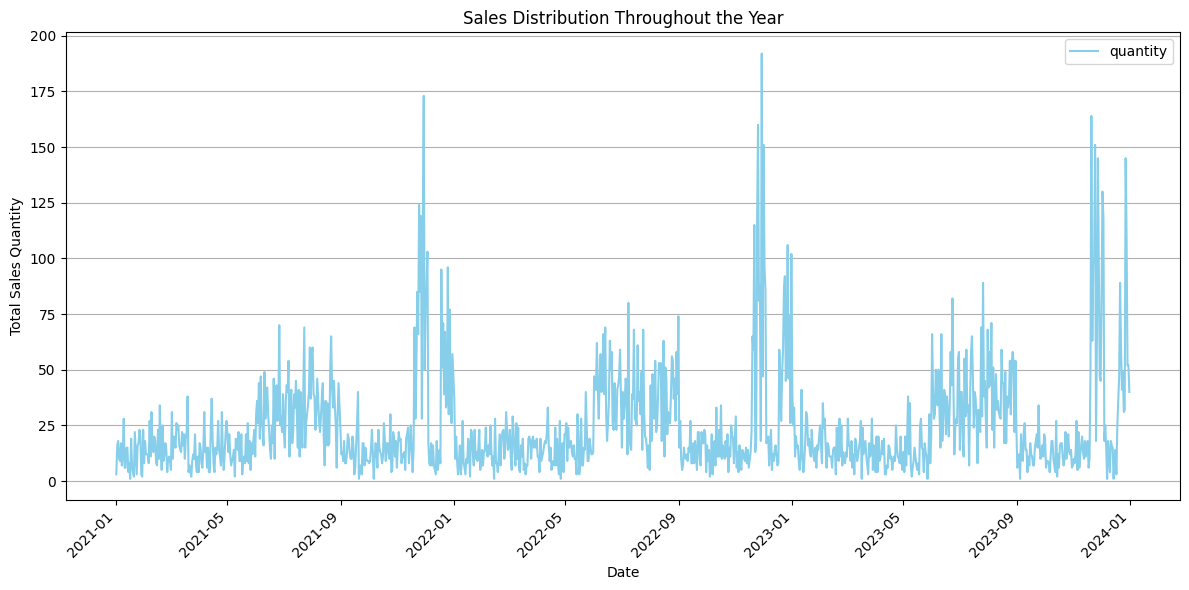

In [13]:
import matplotlib.pyplot as plt

def plot_sales_distribution(sales_data):
    sales_data['date_ordered'] = pd.to_datetime(sales_data['date_ordered'])
    
    # Group by date and sum the quantities
    daily_sales = sales_data.groupby('date_ordered')['quantity'].sum()
    
    plt.figure(figsize=(12, 6))
    daily_sales.plot(kind='line', color='skyblue')  # Continuous line plot for daily sales
    plt.title('Sales Distribution Throughout the Year')
    plt.xlabel('Date')
    plt.ylabel('Total Sales Quantity')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    # # Create a custom legend for months
    # plt.axvline(pd.to_datetime('2021-01-01'), color='gray', linestyle='--', label='Jan')
    # plt.axvline(pd.to_datetime('2021-02-01'), color='gray', linestyle='--', label='Feb')
    # plt.axvline(pd.to_datetime('2021-03-01'), color='gray', linestyle='--', label='Mar')
    # plt.axvline(pd.to_datetime('2021-04-01'), color='gray', linestyle='--', label='Apr')
    # plt.axvline(pd.to_datetime('2021-05-01'), color='gray', linestyle='--', label='May')
    # plt.axvline(pd.to_datetime('2021-06-01'), color='gray', linestyle='--', label='Jun')
    # plt.axvline(pd.to_datetime('2021-07-01'), color='gray', linestyle='--', label='Jul')
    # plt.axvline(pd.to_datetime('2021-08-01'), color='gray', linestyle='--', label='Aug')
    # plt.axvline(pd.to_datetime('2021-09-01'), color='gray', linestyle='--', label='Sep')
    # plt.axvline(pd.to_datetime('2021-10-01'), color='gray', linestyle='--', label='Oct')
    # plt.axvline(pd.to_datetime('2021-11-01'), color='gray', linestyle='--', label='Nov')
    # plt.axvline(pd.to_datetime('2021-12-01'), color='gray', linestyle='--', label='Dec')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the sales distribution
plot_sales_distribution(sales_dataset)



In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def prepare_data(sales_data):
    sales_data['date_ordered'] = pd.to_datetime(sales_data['date_ordered'])
    sales_data['day_of_year'] = sales_data['date_ordered'].dt.dayofyear
    sales_data['week_of_year'] = sales_data['date_ordered'].dt.isocalendar().week  # Get week of the year
    sales_data['year'] = sales_data['date_ordered'].dt.year
    
    # Filter data for 2021 and 2022
    train_data = sales_data[(sales_data['year'] == 2021) | (sales_data['year'] == 2022)]
    # print("xxx")
    # print(train_data)
    # daily_sales = train_data.groupby(['day_of_year', 'year', 'bike_name'])['quantity'].sum().reset_index()
    print(train_data.head())
    # pivot_data = daily_sales.pivot_table(index=['day_of_year', 'year'], columns='bike_name', values='quantity', fill_value=0)
    # print('daily sales:')
    # pivot_data['2023'] = 0  # Placeholder for 2023 predictions
    # print(pivot_data)
    
    # return pivot_data
    return train_data

prepare_data(sales_dataset)



             bike_name      bike_type date_ordered  quantity  day_of_year  \
1  Mountain Climber XT  Mountain Bike   2021-06-01         7          152   
5  Mountain Climber XT  Mountain Bike   2021-06-25         5          176   
7  Mountain Climber XT  Mountain Bike   2021-07-05         4          186   
8       Roadmaster Pro      Road Bike   2022-02-23         1           54   
9        AirMaster 300            BMX   2022-12-19         9          353   

   week_of_year  year  
1            22  2021  
5            25  2021  
7            27  2021  
8             8  2022  
9            51  2022  


,bike_name,bike_type,date_ordered,quantity,day_of_year,week_of_year,year
1,Mountain Climber XT,Mountain Bike,2021-06-01,7,152,22,2021
5,Mountain Climber XT,Mountain Bike,2021-06-25,5,176,25,2021
7,Mountain Climber XT,Mountain Bike,2021-07-05,4,186,27,2021
8,Roadmaster Pro,Road Bike,2022-02-23,1,54,8,2022
9,AirMaster 300,BMX,2022-12-19,9,353,51,2022
...,...,...,...,...,...,...,...
4994,Speedster Pro,Road Bike,2021-04-14,2,104,15,2021
4995,BMX Freestyle Pro,BMX,2022-11-05,2,309,44,2022
4997,Hybrid Explorer,Hybrid Bike,2021-04-21,5,111,16,2021
4998,Speedster Pro,Road Bike,2022-12-25,9,359,51,2022


In [64]:
# Train the model and predict sales for 2023
def predict_sales(sales_data):
    pivot_data = prepare_data(sales_data)
    print('12345678')
    print(pivot_data.head())
    # Features and target
    y = pivot_data[pivot_data.year=='2023']
    print('yyyyyyyyyyyyy')
    X = pivot_data[pivot_data.year.isin([2021, 2022])]
    
    # print(X.head())
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions for 2023
    pivot_data['2023'] = model.predict(X)
    
    return pivot_data['2023']

# Predict sales for 2023
predicted_sales_2023 = predict_sales(sales_dataset)

# Display the predicted sales for 2023
print(predicted_sales_2023)

# ... existing code ...

12345678
bike_name          Speedster Pro  AirMaster 300  BMX Freestyle Pro  \
day_of_year year                                                     
1           2021               0              0                  2   
            2022               0             13                  0   
2           2021               0              2                  0   
            2022               0              0                  2   
3           2021               4              6                  0   

bike_name         Hybrid Explorer  Mountain Climber XT  Roadmaster Pro  \
day_of_year year                                                         
1           2021                0                    0               0   
            2022               12                    0              12   
2           2021               10                    0               4   
            2022                0                    5               0   
3           2021                0                    0  

AttributeError: 'DataFrame' object has no attribute 'year'

In [67]:
def predict_sales(sales_data):
    pivot_data = prepare_data(sales_data)
    
    y = pivot_data[pivot_data.index.get_level_values('year') == 2023]  # Adjusted to use index for year
    X = pivot_data[pivot_data.index.get_level_values('year') < 2023]  # Use all years before 2023
    
    max_year = X.index.get_level_values('year').max()  # Get the most recent year in the data
    weights = max_year - X.index.get_level_values('year') + 1  # Weight inversely related to year
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train, sample_weight=weights[X_train.index])  # Use weights during training
    
    
    pivot_data['2023'] = model.predict(X)
    
    return pivot_data['2023']

predict_sales(sales_dataset)

ValueError: Found input variables with inconsistent numbers of samples: [724, 0]